# Scoring
#### Gros probleme, la variable fraude a seulement 7246 on peut avoir un modele bete que previse toujours 0....

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.model_selection import train_test_split
import scikitplot as skplt

In [2]:
data = pd.read_csv("D:\\Universita\\STatistica\\TIDE\\Deeplearn\\Scoring\\autorisations.csv")

In [3]:
data.head()

,Carte,Pays,Date,Heure,dateheure,CodeRep,MCC,Montant,fraude,FM_Velocity_Condition_3,...,FM_Sum_12,FM_Sum_24,FM_Redondance_MCC_3,FM_Redondance_MCC_6,FM_Redondance_MCC_12,FM_Redondance_MCC_24,FM_Difference_Pays_3,FM_Difference_Pays_6,FM_Difference_Pays_12,FM_Difference_Pays_24
0,0,840,02/12/2003,17:47:52,02/12/2003,15,5812,69.25,0,0,...,69.25,69.25,1,1,1,1,1,1,1,1
1,1,158,25/11/2003,06:00:20,25/11/2003,15,5311,1.00,0,0,...,1.00,1.00,1,1,1,1,1,1,1,1
2,2,826,12/11/2003,14:10:57,12/11/2003,15,5211,516.95,0,0,...,516.95,516.95,1,1,1,1,1,1,1,1
3,3,840,07/11/2003,03:41:55,07/11/2003,14,7399,0.01,0,0,...,0.01,0.01,1,1,1,1,1,1,1,1
4,4,158,23/11/2003,05:07:03,23/11/2003,15,5311,1.00,0,0,...,1.00,1.00,1,1,1,1,1,1,1,1


In [4]:
data.shape

(1151432, 25)

In [5]:
data.dtypes

Carte                         int64
Pays                          int64
Date                         object
Heure                        object
dateheure                    object
CodeRep                       int64
MCC                           int64
Montant                     float64
fraude                        int64
FM_Velocity_Condition_3       int64
FM_Velocity_Condition_6       int64
FM_Velocity_Condition_12      int64
FM_Velocity_Condition_24      int64
FM_Sum_3                    float64
FM_Sum_6                    float64
FM_Sum_12                   float64
FM_Sum_24                   float64
FM_Redondance_MCC_3           int64
FM_Redondance_MCC_6           int64
FM_Redondance_MCC_12          int64
FM_Redondance_MCC_24          int64
FM_Difference_Pays_3          int64
FM_Difference_Pays_6          int64
FM_Difference_Pays_12         int64
FM_Difference_Pays_24         int64
dtype: object

In [6]:
data["fraude"].sum()/len(data)

0.006293033370620237

In [7]:
data.dtypes

Carte                         int64
Pays                          int64
Date                         object
Heure                        object
dateheure                    object
CodeRep                       int64
MCC                           int64
Montant                     float64
fraude                        int64
FM_Velocity_Condition_3       int64
FM_Velocity_Condition_6       int64
FM_Velocity_Condition_12      int64
FM_Velocity_Condition_24      int64
FM_Sum_3                    float64
FM_Sum_6                    float64
FM_Sum_12                   float64
FM_Sum_24                   float64
FM_Redondance_MCC_3           int64
FM_Redondance_MCC_6           int64
FM_Redondance_MCC_12          int64
FM_Redondance_MCC_24          int64
FM_Difference_Pays_3          int64
FM_Difference_Pays_6          int64
FM_Difference_Pays_12         int64
FM_Difference_Pays_24         int64
dtype: object

In [8]:
info_df_num = data.describe()
info_types = pd.DataFrame(data.dtypes)

In [9]:
nb_nan = []
nb_distincts =[]
for v in info_df_num.columns.tolist():
    nb_nan.append(data[v].isnull().sum())
    nb_distincts.append(len(set(data[v])))
    
info_df_num_2 = pd.DataFrame()
info_df_num_2 ["variables"] = info_df_num.columns.tolist()
info_df_num_2["Nb value distinct"] = nb_distincts
info_df_num_2["Nb value missing"] = nb_nan 
info_df_num_2["%Modalité_missing"] = info_df_num_2["Nb value missing"]/len(data)

print(info_df_num_2)

                   variables  Nb value distinct  Nb value missing  \
0                      Carte             198044                 0   
1                       Pays                167                 0   
2                    CodeRep                 15                 0   
3                        MCC                661                 0   
4                    Montant              81202                 0   
5                     fraude                  2                 0   
6    FM_Velocity_Condition_3                 47                 0   
7    FM_Velocity_Condition_6                 82                 0   
8   FM_Velocity_Condition_12                111                 0   
9   FM_Velocity_Condition_24                130                 0   
10                  FM_Sum_3             109836                 0   
11                  FM_Sum_6             115524                 0   
12                 FM_Sum_12             121192                 0   
13                 FM_Sum_24      

In [10]:
list_var_cat = info_types[info_types[0]=="object"].index.tolist()

info_df_cat = pd.DataFrame()
nb_nan = []
nb_distincts =[]
for v in list_var_cat :
    nb_nan.append(data[v].isnull().sum())
    nb_distincts.append(len(set(data[v])))
    
info_df_cat["variables"] = list_var_cat
info_df_cat["Nb value distinct"] = nb_distincts
info_df_cat["Nb value missing"] = nb_nan

print(info_df_cat)

   variables  Nb value distinct  Nb value missing
0       Date                243                 0
1      Heure              85697                 0
2  dateheure                243                 0


In [11]:
data["Heure"] = data["Heure"].str.split(':', expand=True)[0]
data["Date"] = pd.to_datetime(data["Date"], format='%d/%m/%Y')
data["Month"] = data["Date"].dt.month
data["Month"] = data["Month"].astype('object')
data["CodeRep"]=np.where(data["CodeRep"] == 0,1,0)
continents = pd.read_excel("D:\\Universita\\STatistica\\TIDE\\Deeplearn\\Scoring\\continents.xlsx", index_col = "Code numérique")
data["Continent"] = data['Pays'].map(continents["Continent"])
data["Continent"] = np.where(data["Pays"]==891, 'Europe', data["Continent"])
data["Continent"] = np.where(data["Pays"]==530, 'Amérique du Nord', data["Continent"])
data["Continent"] = np.where((data["Pays"]==999)|(data["Pays"]==900), 'Unknown', data["Continent"])
data["FD"] = data['Pays'].map(continents["FD"])
data["FD"] = np.where((data["FD"].isna()) & (data["Continent"]=='Europe'), 0.502679705619812, data["FD"])
data["FD"] = np.where((data["FD"].isna()) & ((data["Continent"]=='Asie')|(data["Continent"]=='Océanie')), 0.350481420755386, data["FD"])
data["FD"] = np.where((data["FD"].isna()) & (data["Continent"]=='Afrique'), 0.1582290828228, data["FD"])
data["FD"] = np.where((data["FD"].isna()) & ((data["Continent"]=='Amérique du Nord')|(data["Continent"]=='Amérique du Sud')), 0.324424803256989, data["FD"])
data["FD"] = np.where((data["FD"].isna()) & (data["Continent"]=='Unknown'), 0.319519817829132, data["FD"])

# Division of test and train data.
Is it necessary to do it before analysing for possible seasonalities or country risk?

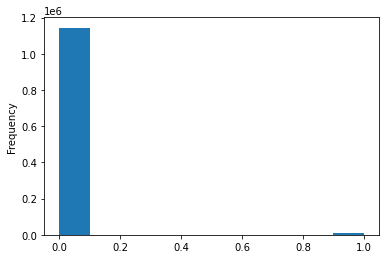

In [12]:
data["fraude"].plot(kind = 'hist');

In [13]:
X = data.drop(columns=["fraude","Carte", "Date", "dateheure", "MCC"])
Y = data["fraude"]

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.3, stratify=Y)
train = X_train.join(Y_train)

## Is there a country specific risk involved?

In [15]:
summa= train.groupby("Pays").sum()[["fraude"]]
summa.sort_values(by="fraude")

,fraude
Pays,
8,0
524,0
512,0
508,0
498,0
...,...
56,394
380,487
826,659


In [16]:
counts = pd.Series(train["Pays"]).value_counts()
counts = pd.DataFrame(counts)
counts = counts.rename(columns={"Pays":"NTrans"})

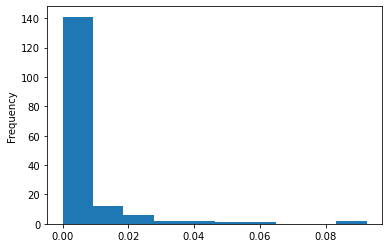

In [17]:
cmerged = pd.merge(counts,summa,left_index=True, right_index=True)
cmerged.reset_index(inplace=True)
cmerged = cmerged.rename(columns={"index":"Pays"})
cmerged["Fratio"] = cmerged["fraude"]/cmerged["NTrans"]
cmerged["Fratio"].plot(kind = 'hist');

In [18]:
sum(cmerged["Fratio"]>0.025)

10

In [19]:
cmerged[(cmerged["Fratio"]>0.025)]

,Pays,NTrans,fraude,Fratio
13,36,5615,155,0.027605
14,76,5220,256,0.049042
17,792,4255,264,0.062045
37,356,1859,47,0.025282
52,188,859,34,0.039581
65,608,535,15,0.028037
79,320,252,11,0.043651
97,218,119,10,0.084034
101,862,108,10,0.092593
103,690,103,3,0.029126


D:\Users\alepi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


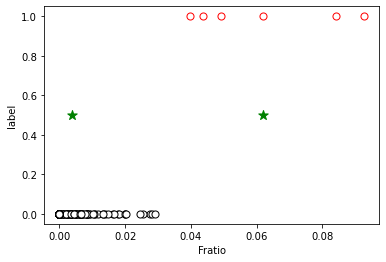

In [20]:
kmeans = KMeans(n_clusters=2, init='random', n_init=1000)
cmerged['label'] = kmeans.fit_predict(cmerged[['Fratio']])
ax = cmerged[cmerged['label']==0].plot.scatter(x='Fratio', y='label', s=50, color='white', edgecolor='black')
cmerged[cmerged['label']==1].plot.scatter(x='Fratio', y='label', s=50, color='white', ax=ax, edgecolor='red')
plt.scatter(kmeans.cluster_centers_.ravel(), [0.5]*len(kmeans.cluster_centers_), s=100, color='green', marker='*');

In [21]:
cmerged[cmerged['label']==1]

,Pays,NTrans,fraude,Fratio,label
14,76,5220,256,0.049042,1
17,792,4255,264,0.062045,1
52,188,859,34,0.039581,1
79,320,252,11,0.043651,1
97,218,119,10,0.084034,1
101,862,108,10,0.092593,1


In [22]:
# K-Means and a 0.025 threshold level bring the same result

#### And the high risk countries are: Australia (36), Brasil (76), Turkey (792), India (356), Costa Rica (188), Philippines (608), Taiwan (158), Guatemala (320), Ecuador (218), Venezuela (862).

In [23]:
X_train["Pays_ris"]=0

In [24]:
X_train["Pays_ris"]=0
#conditions = [X_train.Pays==36, X_train.Pays==76, X_train.Pays==792, X_train.Pays==356, X_train.Pays==188,
#                                X_train.Pays==608, X_train.Pays==158, X_train.Pays==320, X_train.Pays==218, X_train.Pays==862]
X_train['AUX1'] = np.where(np.logical_or(X_train.Pays==36, X_train.Pays==76, X_train.Pays==792)
                               ,1, 0)
X_train['AUX2'] = np.where(np.logical_or(X_train.Pays==356, X_train.Pays==188, X_train.Pays==608)
                               ,1, 0)
X_train['AUX3'] = np.where(np.logical_or(X_train.Pays==158, X_train.Pays==320, X_train.Pays==218)
                               ,1, 0)
X_train['AUX4'] = np.where(X_train.Pays==862,1,0)
X_train['AUX12'] = np.where(np.logical_or(X_train.AUX1==1, X_train.AUX2==1)
                               ,1, 0)
X_train['Pays_ris'] = np.where(np.logical_or(X_train.AUX12==1, X_train.AUX3==1, X_train.AUX4==1)
                               ,1, 0)
X_train = X_train.drop(columns=["AUX1","AUX2", "AUX3", "AUX4", "AUX12","Pays"])

In [25]:
X_test["Pays_ris"]=0
X_test['AUX1'] = np.where(np.logical_or(X_test.Pays==36, X_test.Pays==76, X_test.Pays==792)
                               ,1, 0)
X_test['AUX2'] = np.where(np.logical_or(X_test.Pays==356, X_test.Pays==188, X_test.Pays==608)
                               ,1, 0)
X_test['AUX3'] = np.where(np.logical_or(X_test.Pays==158, X_test.Pays==320, X_test.Pays==218)
                               ,1, 0)
X_test['AUX4'] = np.where(X_test.Pays==862,1,0)
X_test['AUX12'] = np.where(np.logical_or(X_test.AUX1==1, X_test.AUX2==1)
                               ,1, 0)
X_test['Pays_ris'] = np.where(np.logical_or(X_test.AUX12==1, X_test.AUX3==1, X_test.AUX4==1)
                               ,1, 0)
X_test = X_test.drop(columns=["AUX1","AUX2", "AUX3", "AUX4", "AUX12","Pays"])

In [26]:
sum(X_train["Pays_ris"])/len(X_train)

0.01768357894893561

In [27]:
sum(X_test["Pays_ris"])/len(X_test)

0.017190168775149815

## Verifying if there are clusters in the hours of the day.

In [28]:
sumh= train.groupby("Heure").sum()[["fraude"]]
sumh.sort_values(by="fraude")

,fraude
Heure,
06,73
05,75
07,83
04,95
08,97
03,104
01,130
02,136
09,147


In [29]:
counth = pd.Series(train["Heure"]).value_counts()
counth = pd.DataFrame(counth)
counth = counth.rename(columns={"Heure":"NTrans"})

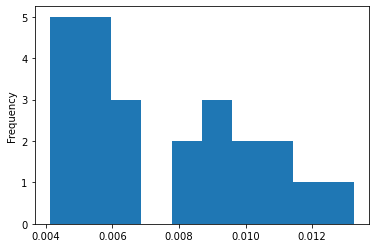

In [30]:
hmerged = pd.merge(counth, sumh, left_index=True, right_index=True)
hmerged.reset_index(inplace=True)
hmerged = hmerged.rename(columns={"index":"Heure"})
hmerged["Fratio"] = hmerged["fraude"]/hmerged["NTrans"]
hmerged["Fratio"].plot(kind = 'hist');

D:\Users\alepi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


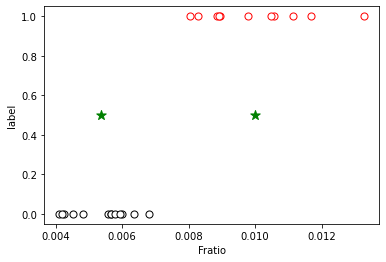

In [31]:
kmeans = KMeans(n_clusters=2, init='random', n_init=1000)
hmerged['label'] = kmeans.fit_predict(hmerged[['Fratio']])
ax = hmerged[hmerged['label']==0].plot.scatter(x='Fratio', y='label', s=50, color='white', edgecolor='black')
hmerged[hmerged['label']==1].plot.scatter(x='Fratio', y='label', s=50, color='white', ax=ax, edgecolor='red')
plt.scatter(kmeans.cluster_centers_.ravel(), [0.5]*len(kmeans.cluster_centers_), s=100, color='green', marker='*');

In [32]:
hmerged[hmerged['label']==1]

,Heure,NTrans,fraude,Fratio,label
9,19,40762,337,0.008268,1
11,20,30968,274,0.008848,1
12,21,28776,231,0.008028,1
15,23,21824,195,0.008935,1
16,00,16062,157,0.009775,1
18,01,12305,130,0.010565,1
19,02,10253,136,0.013264,1
20,03,8897,104,0.011689,1
21,04,8531,95,0.011136,1
22,06,8197,73,0.008906,1


Fraudes are more frequent during night hours even if it is possible that they are constant during the day and the thing which changes the most is the number of transactions during the day.

## Checking possible seasonalities.

In [33]:
summ= train.groupby("Month").sum()[["fraude"]]
summ.sort_values(by="fraude")

,fraude
Month,
4,494
2,547
11,567
3,632
5,658
1,696
12,713
6,765


In [34]:
mcount = pd.Series(train["Month"]).value_counts()
mcount = pd.DataFrame(mcount)
mcount = mcount.rename(columns={"Month":"NTrans"})

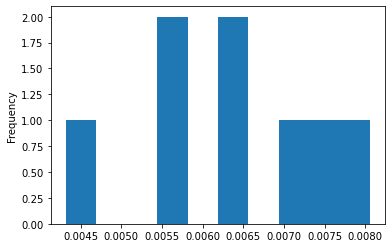

In [35]:
mmerged = pd.merge(mcount, summ, left_index=True, right_index=True)
mmerged.reset_index(inplace=True)
mmerged = mmerged.rename(columns={"index":"Month"})
mmerged["Fratio"] = mmerged["fraude"]/mmerged["NTrans"]
mmerged["Fratio"].plot(kind = 'hist');

D:\Users\alepi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


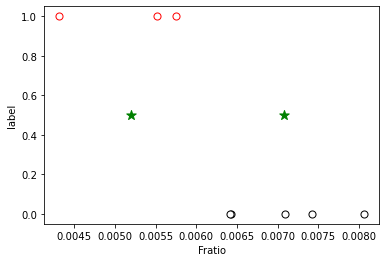

In [36]:
kmeans = KMeans(n_clusters=2)
mmerged['label'] = kmeans.fit_predict(mmerged[['Fratio']])
ax = mmerged[mmerged['label']==0].plot.scatter(x='Fratio', y='label', s=50, color='white', edgecolor='black')
mmerged[mmerged['label']==1].plot.scatter(x='Fratio', y='label', s=50, color='white', ax=ax, edgecolor='red')
plt.scatter(kmeans.cluster_centers_.ravel(), [0.5]*len(kmeans.cluster_centers_), s=100, color='green', marker='*');

In [37]:
mmerged[mmerged['label']==1]

,Month,NTrans,fraude,Fratio,label
0,5,119385,658,0.005512,1
1,4,114476,494,0.004315,1
5,2,95108,547,0.005751,1


In [38]:
mmerged[mmerged['label']==0]

,Month,NTrans,fraude,Fratio,label
2,6,107873,765,0.007092,0
3,3,98329,632,0.006427,0
4,12,96043,713,0.007424,0
6,11,88441,567,0.006411,0
7,1,86347,696,0.008061,0


In this case I can't see a difference in frauds given the month.

## Modelisation

In [39]:
X_train = X_train.drop(columns=["Heure","Month","Continent"]) # Can be held eventually
X_test = X_test.drop(columns=["Heure","Month", "Continent"]) # Can be held eventually

## Random Forest for base model

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Integer,Categorical
from timeit import default_timer as timer
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

In [41]:
# param_dict_bayes_RF = {
#     'n_estimators' : Integer(10,200),
#     'criterion': Categorical(['gini', 'entropy']), 
#     'max_depth': Integer(3,10),
#     'bootstrap':Categorical([True,False])}

# NB_ITER = 5

# opt = BayesSearchCV(RandomForestClassifier(),param_dict_bayes_RF,n_iter=NB_ITER,cv=5,scoring = 'roc_auc')

# start = timer()  
# opt.fit(X_train, Y_train)
# delais = timer()- start
# best_param_opti_bayes = opt.best_params_
# best_score_opti_bayes = opt.best_score_
# all_result_opti_bayes = opt.cv_results_
# print(" #### RECHERCHE DES PARAMETRES OPTIMAUX POUR LE RANDOM FOREST #### ")
# print(" \n Durée de recherche en seconde :")
# print(delais)
# print("\n Paramètres optimaux : ")
# best_param_opti_bayes =opt.best_params_
# print(best_param_opti_bayes)
# best_score_opti_bayes = opt.best_score_
# print("\n Résultats  : " + str(best_score_opti_bayes))

In [42]:
# rf_clf = RandomForestClassifier(**opt.best_params_)

# rf_clf.fit(X_train,Y_train)

# #Calcul des métriques

# fpr_train_RF, tpr_train_RF, thresholds_train_RF = roc_curve(Y_train, rf_clf.predict_proba(X_train)[:,1])
# roc_auc_train_RF = auc(fpr_train_RF, tpr_train_RF)

# fpr_test_RF, tpr_test_RF, thresholds_test_RF = roc_curve(Y_test, rf_clf.predict_proba(X_test)[:,1])
# roc_auc_test_RF = auc(fpr_test_RF, tpr_test_RF)

# plt.figure()
# lw = 2
# plt.plot(fpr_train_RF, tpr_train_RF, color='darkorange',
#          lw=lw, label='Train -RF - ROC curve (area = %0.2f)' % roc_auc_train_RF)
# plt.plot(fpr_test_RF, tpr_test_RF, color='darkblue',
#          lw=lw, label='Test -RF - ROC curve (area = %0.2f)' % roc_auc_test_RF)

# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Comparaison courve ROC Train ')
# plt.legend(loc="lower right")
# plt.show()



# ### COURBES PRECISION RAPPEL

# precision_train_RF, recall_train_RF, thresholds_train_RF = precision_recall_curve(Y_train,
#                                                                          rf_clf.predict_proba(X_train)[:,1])

# precision_test_RF, recall_test_RF, thresholds_test_RF = precision_recall_curve(Y_test,
#                                                                          rf_clf.predict_proba(X_test)[:,1])

# plt.figure()
# lw = 2
# plt.plot(recall_train_RF,precision_train_RF, color='darkorange',
#          lw=lw, label='Train - RF')
# plt.plot(recall_test_RF,precision_test_RF, color='darkblue',
#          lw=lw, label='Test - RF')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Comparaison courbe PRECISION / RAPPEL')
# plt.legend(loc="lower left")
# plt.show()

In [43]:
# importance_variable_rf = pd.DataFrame()
# importance_variable_rf["Variable"]= X_train.columns.tolist()
# importance_variable_rf["Feature Importance"] = rf_clf.feature_importances_

# importance_variable_rf.sort_values(by = "Feature Importance", axis=0, ascending=False, inplace=True)

# print("Les 10 variables les plus importantes : \n")
# importance_variable_rf.head(10)

### Without country risk

In [48]:
X_train2 = X_train.drop(columns=["Pays_ris"]) # Can be held eventually
X_test2 = X_test.drop(columns=["Pays_ris"]) # Can be held eventually

In [49]:
param_dict_bayes_RF = {
    'n_estimators' : Integer(10,200),
    'criterion': Categorical(['gini', 'entropy']), 
    'max_depth': Integer(3,10),
    'bootstrap':Categorical([True,False])}

NB_ITER = 5

opt = BayesSearchCV(RandomForestClassifier(),param_dict_bayes_RF,n_iter=NB_ITER,cv=5,scoring = 'roc_auc')

start = timer()  
opt.fit(X_train2, Y_train)
delais = timer()- start
best_param_opti_bayes = opt.best_params_
best_score_opti_bayes = opt.best_score_
all_result_opti_bayes = opt.cv_results_
print(" #### RECHERCHE DES PARAMETRES OPTIMAUX POUR LE RANDOM FOREST #### ")
print(" \n Durée de recherche en seconde :")
print(delais)
print("\n Paramètres optimaux : ")
best_param_opti_bayes =opt.best_params_
print(best_param_opti_bayes)
best_score_opti_bayes = opt.best_score_
print("\n Résultats  : " + str(best_score_opti_bayes))

 #### RECHERCHE DES PARAMETRES OPTIMAUX POUR LE RANDOM FOREST #### 
 
 Durée de recherche en seconde :
2337.3084000999997

 Paramètres optimaux : 
OrderedDict([('bootstrap', False), ('criterion', 'entropy'), ('max_depth', 8), ('n_estimators', 161)])

 Résultats  : 0.8118506437929076


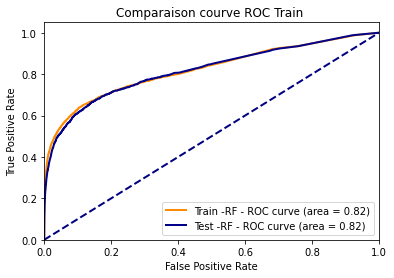

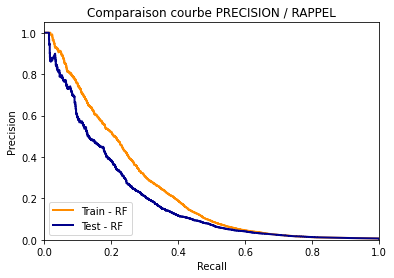

In [50]:
rf_clf = RandomForestClassifier(**opt.best_params_)

rf_clf.fit(X_train2,Y_train)

#Calcul des métriques

fpr_train_RF, tpr_train_RF, thresholds_train_RF = roc_curve(Y_train, rf_clf.predict_proba(X_train2)[:,1])
roc_auc_train_RF = auc(fpr_train_RF, tpr_train_RF)

fpr_test_RF, tpr_test_RF, thresholds_test_RF = roc_curve(Y_test, rf_clf.predict_proba(X_test2)[:,1])
roc_auc_test_RF = auc(fpr_test_RF, tpr_test_RF)

plt.figure()
lw = 2
plt.plot(fpr_train_RF, tpr_train_RF, color='darkorange',
         lw=lw, label='Train -RF - ROC curve (area = %0.2f)' % roc_auc_train_RF)
plt.plot(fpr_test_RF, tpr_test_RF, color='darkblue',
         lw=lw, label='Test -RF - ROC curve (area = %0.2f)' % roc_auc_test_RF)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparaison courve ROC Train ')
plt.legend(loc="lower right")
plt.show()



### COURBES PRECISION RAPPEL

precision_train_RF, recall_train_RF, thresholds_train_RF = precision_recall_curve(Y_train,
                                                                         rf_clf.predict_proba(X_train2)[:,1])

precision_test_RF, recall_test_RF, thresholds_test_RF = precision_recall_curve(Y_test,
                                                                         rf_clf.predict_proba(X_test2)[:,1])

plt.figure()
lw = 2
plt.plot(recall_train_RF,precision_train_RF, color='darkorange',
         lw=lw, label='Train - RF')
plt.plot(recall_test_RF,precision_test_RF, color='darkblue',
         lw=lw, label='Test - RF')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Comparaison courbe PRECISION / RAPPEL')
plt.legend(loc="lower left")
plt.show()

In [53]:
importance_variable_rf = pd.DataFrame()
importance_variable_rf["Variable"]= X_train2.columns.tolist()
importance_variable_rf["Feature Importance"] = rf_clf.feature_importances_

importance_variable_rf.sort_values(by = "Feature Importance", axis=0, ascending=False, inplace=True)

print("Les 10 variables les plus importantes : \n")
importance_variable_rf.head(10)

Les 10 variables les plus importantes : 



,Variable,Feature Importance
5,FM_Velocity_Condition_24,0.148670
9,FM_Sum_24,0.142235
4,FM_Velocity_Condition_12,0.104916
8,FM_Sum_12,0.102081
3,FM_Velocity_Condition_6,0.077726
7,FM_Sum_6,0.065147
2,FM_Velocity_Condition_3,0.057726
18,FD,0.041825
1,Montant,0.041258
6,FM_Sum_3,0.036072


<Figure size 504x504 with 0 Axes>

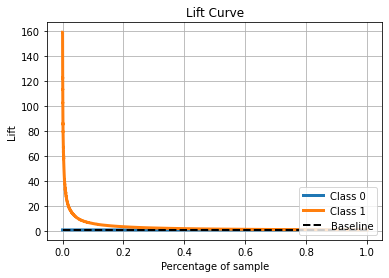

In [51]:
plt.figure(figsize=(7,7))
Y_predict_proba = rf_clf.predict_proba(X_test2)
skplt.metrics.plot_lift_curve(Y_test,Y_predict_proba  )
plt.show()
plt.show()

In [54]:
res_modele=pd.DataFrame()
res_modele["Target"]=Y_test
res_modele["Proba_target"]=rf_clf.predict_proba(X_test2)[:,1]

res_modele.sort_values(by =["Proba_target"], inplace = True,ascending=False)

res_modele['QuantileRank']= pd.qcut(res_modele["Proba_target"], q = 5, labels = False)
res_modele.head(7)

,Target,Proba_target,QuantileRank
999600,1,0.738188,4
999601,1,0.730752,4
999608,1,0.721582,4
472787,1,0.712127,4
1110464,1,0.711481,4
472779,1,0.711332,4
999611,1,0.708912,4


In [55]:
agg_tmp=pd.DataFrame(res_modele.groupby('QuantileRank')['Target'].agg(['sum','count']))

agg_tmp.sort_values(by =["QuantileRank"], inplace = True,ascending=False)

print(agg_tmp)

               sum  count
QuantileRank             
4             1538  69067
3              216  67663
2              126  51408
1              153  74471
0              141  82821


In [56]:
agg_tmp["Precision"] = agg_tmp["sum"]/agg_tmp["count"]
agg_tmp["Proba_alatoire"]= Y_test.mean()
agg_tmp["lift"]=agg_tmp["Precision"]/agg_tmp["Proba_alatoire"]
agg_tmp["Part population cible"]=agg_tmp["sum"]/Y_test.sum()
agg_tmp["Part population"]=agg_tmp["count"]/Y_test.count()
print(agg_tmp)

               sum  count  Precision  Proba_alatoire      lift  \
QuantileRank                                                     
4             1538  69067   0.022268        0.006294  3.538232   
3              216  67663   0.003192        0.006294  0.507228   
2              126  51408   0.002451        0.006294  0.389440   
1              153  74471   0.002054        0.006294  0.326441   
0              141  82821   0.001702        0.006294  0.270507   

              Part population cible  Part population  
QuantileRank                                          
4                          0.707452         0.199945  
3                          0.099356         0.195880  
2                          0.057958         0.148823  
1                          0.070377         0.215589  
0                          0.064857         0.239762  


### Trying resampling techniques

In [57]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [58]:
over_sampler = SMOTE(k_neighbors=2)
X_res, Y_res = over_sampler.fit_resample(X_train2, Y_train)
print(f"Training target statistics: {Counter(Y_res)}")
print(f"Testing target statistics: {Counter(Y_test)}")

Training target statistics: Counter({0: 800930, 1: 800930})
Testing target statistics: Counter({0: 343256, 1: 2174})


In [59]:
param_dict_bayes_RF = {
    'n_estimators' : Integer(10,200),
    'criterion': Categorical(['gini', 'entropy']), 
    'max_depth': Integer(3,10),
    'bootstrap':Categorical([True,False])}

NB_ITER = 5

opt = BayesSearchCV(RandomForestClassifier(),param_dict_bayes_RF,n_iter=NB_ITER,cv=5,scoring = 'roc_auc')

start = timer()  
opt.fit(X_res, Y_res)
delais = timer()- start
best_param_opti_bayes = opt.best_params_
best_score_opti_bayes = opt.best_score_
all_result_opti_bayes = opt.cv_results_
print(" #### RECHERCHE DES PARAMETRES OPTIMAUX POUR LE RANDOM FOREST #### ")
print(" \n Durée de recherche en seconde :")
print(delais)
print("\n Paramètres optimaux : ")
best_param_opti_bayes =opt.best_params_
print(best_param_opti_bayes)
best_score_opti_bayes = opt.best_score_
print("\n Résultats  : " + str(best_score_opti_bayes))

 #### RECHERCHE DES PARAMETRES OPTIMAUX POUR LE RANDOM FOREST #### 
 
 Durée de recherche en seconde :
6453.647114800001

 Paramètres optimaux : 
OrderedDict([('bootstrap', False), ('criterion', 'gini'), ('max_depth', 6), ('n_estimators', 164)])

 Résultats  : 0.8595681674512882


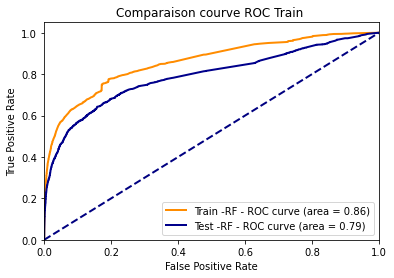

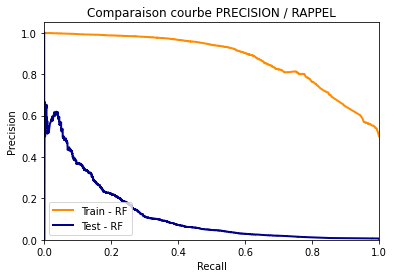

In [60]:
rf_clf = RandomForestClassifier(**opt.best_params_)
# rf_clf = RandomForestClassifier(bootstrap=True, criterion = "entropy", max_depth=8,n_estimators=199)
rf_clf.fit(X_res,Y_res)

#Calcul des métriques

fpr_train_RF, tpr_train_RF, thresholds_train_RF = roc_curve(Y_res, rf_clf.predict_proba(X_res)[:,1])
roc_auc_train_RF = auc(fpr_train_RF, tpr_train_RF)

fpr_test_RF, tpr_test_RF, thresholds_test_RF = roc_curve(Y_test, rf_clf.predict_proba(X_test2)[:,1])
roc_auc_test_RF = auc(fpr_test_RF, tpr_test_RF)

plt.figure()
lw = 2
plt.plot(fpr_train_RF, tpr_train_RF, color='darkorange',
         lw=lw, label='Train -RF - ROC curve (area = %0.2f)' % roc_auc_train_RF)
plt.plot(fpr_test_RF, tpr_test_RF, color='darkblue',
         lw=lw, label='Test -RF - ROC curve (area = %0.2f)' % roc_auc_test_RF)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparaison courve ROC Train ')
plt.legend(loc="lower right")
plt.show()



### COURBES PRECISION RAPPEL

precision_train_RF, recall_train_RF, thresholds_train_RF = precision_recall_curve(Y_res,
                                                                         rf_clf.predict_proba(X_res)[:,1])

precision_test_RF, recall_test_RF, thresholds_test_RF = precision_recall_curve(Y_test,
                                                                         rf_clf.predict_proba(X_test2)[:,1])

plt.figure()
lw = 2
plt.plot(recall_train_RF,precision_train_RF, color='darkorange',
         lw=lw, label='Train - RF')
plt.plot(recall_test_RF,precision_test_RF, color='darkblue',
         lw=lw, label='Test - RF')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Comparaison courbe PRECISION / RAPPEL')
plt.legend(loc="lower left")
plt.show()

In [61]:
importance_variable_rf = pd.DataFrame()
importance_variable_rf["Variable"]= X_res.columns.tolist()
importance_variable_rf["Feature Importance"] = rf_clf.feature_importances_

importance_variable_rf.sort_values(by = "Feature Importance", axis=0, ascending=False, inplace=True)

print("Les 10 variables les plus importantes : \n")
importance_variable_rf.head(10)

Les 10 variables les plus importantes : 



,Variable,Feature Importance
9,FM_Sum_24,0.204222
18,FD,0.125505
0,CodeRep,0.109439
8,FM_Sum_12,0.105540
7,FM_Sum_6,0.099255
5,FM_Velocity_Condition_24,0.087581
3,FM_Velocity_Condition_6,0.054700
4,FM_Velocity_Condition_12,0.051976
6,FM_Sum_3,0.049370
2,FM_Velocity_Condition_3,0.044271


<Figure size 504x504 with 0 Axes>

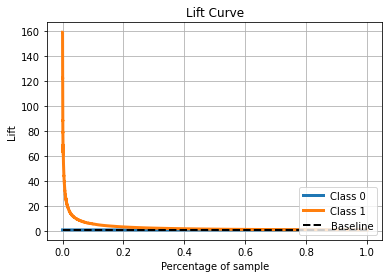

In [48]:
plt.figure(figsize=(7,7))
Y_predict_proba = rf_clf.predict_proba(X_test2)
skplt.metrics.plot_lift_curve(Y_test,Y_predict_proba  )
plt.show()
plt.show();

In [49]:
res_modele=pd.DataFrame()
res_modele["Target"]=Y_test
res_modele["Proba_target"]=rf_clf.predict_proba(X_test2)[:,1]

res_modele.sort_values(by =["Proba_target"], inplace = True,ascending=False)

res_modele['QuantileRank']= pd.qcut(res_modele["Proba_target"], q = 5, labels = False)
res_modele.head(7)

,Target,Proba_target,QuantileRank
1110463,1,0.993002,4
130801,1,0.992729,4
883929,1,0.992671,4
472786,1,0.992490,4
182279,1,0.992237,4
237373,1,0.992154,4
472790,1,0.992123,4


In [51]:
agg_tmp=pd.DataFrame(res_modele.groupby('QuantileRank')['Target'].agg(['sum','count']))

agg_tmp.sort_values(by =["QuantileRank"], inplace = True,ascending=False)

print(agg_tmp)

               sum  count
QuantileRank             
4             1470  69012
3              183  58236
2              173  80008
1              197  69088
0              151  69086


In [52]:
agg_tmp["Precision"] = agg_tmp["sum"]/agg_tmp["count"]
agg_tmp["Proba_alatoire"]= Y_test.mean()
agg_tmp["lift"]=agg_tmp["Precision"]/agg_tmp["Proba_alatoire"]
agg_tmp["Part population cible"]=agg_tmp["sum"]/Y_test.sum()
agg_tmp["Part population"]=agg_tmp["count"]/Y_test.count()
print(agg_tmp)

               sum  count  Precision  Proba_alatoire      lift  \
QuantileRank                                                     
4             1470  69012   0.021301        0.006294  3.384490   
3              183  58236   0.003142        0.006294  0.499298   
2              173  80008   0.002162        0.006294  0.343568   
1              197  69088   0.002851        0.006294  0.453069   
0              151  69086   0.002186        0.006294  0.347286   

              Part population cible  Part population  
QuantileRank                                          
4                          0.676173         0.199786  
3                          0.084177         0.168590  
2                          0.079577         0.231619  
1                          0.090616         0.200006  
0                          0.069457         0.200000  
